<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/AMERICANAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evitando o Overffiting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Importando os dados de Treinamento

In [ ]:
import gdown
!gdown 1BgAUJFeJ1IW81wCcwQ-Hwk81-ZaIvZmZ
!gdown 1MSRZB9MW_1bv9NPwD6cb7o9mUl1XoGJ2

Downloading...
From: https://drive.google.com/uc?id=1BgAUJFeJ1IW81wCcwQ-Hwk81-ZaIvZmZ
To: /content/AMER3.SA-Treinamento.csv
100% 220k/220k [00:00<00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MSRZB9MW_1bv9NPwD6cb7o9mUl1XoGJ2
To: /content/AMER3.SA-Teste.csv
100% 1.37k/1.37k [00:00<00:00, 2.25MB/s]


In [ ]:
dataset_treino = pd.read_csv('AMER3.SA-Treinamento.csv')
dataset_treino = dataset_treino.dropna()
treino_set = dataset_treino.iloc[:, 1:2].values

In [ ]:
dataset_treino.iloc[:, 1:2]

,Open
0,41.949505
1,41.507931
2,40.174377
3,40.183212
4,41.331303
...,...
3220,9.190000
3221,9.210000
3222,9.380000
3223,9.220000


## Dimensionamento dos dados

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
treino_set_scaled = sc.fit_transform(treino_set)

## Criação de uma estrutura de dados com 20 timesteps e 1 um saída

In [ ]:
X_treino = []
y_treino = []
for i in range(20, 3225):
    X_treino.append(treino_set_scaled[i-20:i, 0])
    y_treino.append(treino_set_scaled[i, 0])
X_treino, y_treino = np.array(X_treino), np.array(y_treino)

## Reshaping

In [ ]:
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

In [ ]:
X_treino.shape[1], 1

(20, 1)

## Inicializa a RNA 
### Um modelo sequencial é apropriado para um conjunto simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

In [ ]:
regressor = Sequential()

## Adicionando a primeira camada LSTM (É uma arquitetura de rede neural recorrente) e alguma regularização de Dropout

### O intuito é reduzir o overfitting 

### Dropout Ele consiste em aleatoriamente descartar algumas unidades (neurônios) durante o treinamento de cada época. Isso significa que cada unidade é mantida com uma certa probabilidade (normalmente 60%) e descartada com uma certa probabilidade (40%) -- Em nosso caso.

### A regularização L1, também conhecida como Lasso, adiciona o valor absoluto dos coeficientes do modelo como parte da função de perda a ser otimizada. Isso resulta em uma penalização mais forte dos coeficientes maiores e pode levar à seleção automática de recursos, ou seja, à atribuição de coeficientes próximos a zero a recursos menos importantes.

### A regularização L2, também conhecida como Ridge, adiciona o quadrado dos coeficientes do modelo como parte da função de perda a ser otimizada. Isso resulta em uma penalização mais suave dos coeficientes maiores, mas ainda mantém a estabilidade no modelo e previne o overfitting.

In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True, input_shape = (X_treino.shape[1], 1)))
regressor.add(Dropout(0.4))

## Adicionando uma segunda camada de LSTM com Regularização Dropout 

---



In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma terceira camada de LSTM com Regularização Dropout 


In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma quarta camada de LSTM com Regularização Dropout

In [ ]:
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.4))

## Adicionando a camada de saída



In [ ]:
regressor.add(Dense(units = 1))

## Compilando RNA 
### Utilizando a otimização ADAM: A otimização de Adam é um método de descida gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.

### A função loss é por meio da média dos quadrados 

### Utilize outros otimizadores: https://keras.io/api/optimizers/

### Utilize outras funções loss: https://keras.io/api/losses/


In [ ]:
regressor.compile(optimizer = 'Nadam', loss = 'mean_squared_error')

## Fitting da RNA para treinamento do set

In [ ]:
regressor.fit(X_treino, y_treino, epochs = 100, batch_size = 32)

Epoch 1/100
101/101 [==============================] - 13s 55ms/step - loss: 0.0067
Epoch 2/100
101/101 [==============================] - 5s 53ms/step - loss: 0.0031
Epoch 3/100
101/101 [==============================] - 6s 57ms/step - loss: 0.0026
Epoch 4/100
101/101 [==============================] - 6s 56ms/step - loss: 0.0026
Epoch 5/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0023
Epoch 6/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0022
Epoch 7/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0017
Epoch 8/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0018
Epoch 9/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0015
Epoch 10/100
101/101 [==============================] - 5s 54ms/step - loss: 0.0017
Epoch 11/100
101/101 [==============================] - 6s 56ms/step - loss: 0.0017
Epoch 12/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0014


## Obtendo o preço real

In [ ]:
dataset_test = pd.read_csv('/content/AMER3.SA-Teste.csv')
real_preco_acao = dataset_test.iloc[:, 1:2].values

## Previsão

In [ ]:
dataset_total = pd.concat((dataset_treino['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 40):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


## Visualizando

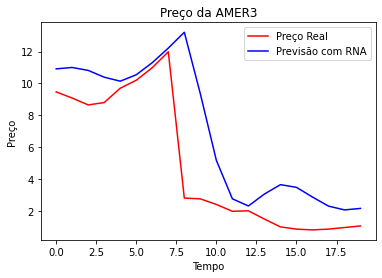

In [ ]:
plt.plot(real_preco_acao, color = 'red', label = 'Preço Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Previsão com RNA')
plt.title('Preço da AMER3')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()